In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

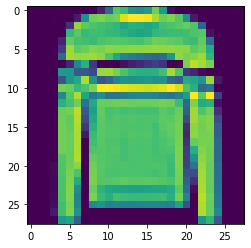

In [4]:
plt.imshow(X_train_full[5,:].reshape(28,28))

In [5]:
#creating a validation set 
X_valid,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Building a neural network

In [7]:
#creates a single stack of layers connected sequentially
model = keras.models.Sequential()

In [8]:
#this is a Flatten layer. It converts the specified input shape into a (-1,1) instance. 
model.add(keras.layers.Flatten(input_shape = [28,28]))

In [9]:
#next we add the first hidden layer containing 300 neurons. It will use the Rectified Linear Unit Activation Function(ReLU). 
#This does not include bias terms 
model.add(keras.layers.Dense(300, activation = "relu"))

In [10]:
#next we add another hidden layer with 100 neurons in it
model.add(keras.layers.Dense(100, activation = "relu"))

In [11]:
#last we add in the output layer which has 10 neurons for the 10 different classes
model.add(keras.layers.Dense(10, activation = "softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers

In [14]:
weights, biases = model.layers[1].get_weights()

In [15]:
weights.shape

(784, 300)

In [16]:
biases.shape

(300,)

The shape of the weight matrix is dependant on the number of inputs. This is why input_shape should be specified in keras.layers.Flatten. 

In [20]:
#using compile method to specify the loss function, optimizer to use and extra metrics to compute during training 
model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "sgd",
                metrics = ["accuracy"])

In [21]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
keras.utils.to_categorical(y_train_full)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
history = model.fit(X_train,y_train,epochs = 30, 
                    validation_data = (X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0162 - accuracy: 0.6780 - val_loss: 0.5158 - val_accuracy: 0.8264
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5031 - accuracy: 0.8266 - val_loss: 0.4676 - val_accuracy: 0.8396
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4497 - accuracy: 0.8421 - val_loss: 0.4444 - val_accuracy: 0.8516
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4289 - accuracy: 0.8495 - val_loss: 0.4210 - val_accuracy: 0.8550
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4095 - accuracy: 0.8562 - val_loss: 0.3811 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3799 - accuracy: 0.8648 - val_loss: 0.3660 - val_accuracy: 0.8756
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3678 - accuracy: 0.8696 - val_loss: 0.3575 - val_accuracy:

For skewed datasets with some classes being overrepresented while others are underrepresented, it would be useful to set the class_weight argument in the fit method. 

For cases where we want instances to be given different weights, like in the case of outliers (NBA dataset), we need to use sample_weight. For sample_weight we can either pass a flat Numpy array with the same length as the input samples. 

In [24]:
import pandas as pd
df = pd.DataFrame(data = history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.730196,0.761400,0.515762,0.8264
1,0.491283,0.829509,0.467613,0.8396
2,0.446439,0.843691,0.444440,0.8516
3,0.420002,0.853400,0.421005,0.8550
4,0.400331,0.858891,0.381099,0.8686
5,0.381034,0.865109,0.366034,0.8756
6,0.367739,0.869964,0.357544,0.8774
7,0.356234,0.873709,0.354837,0.8726
8,0.345176,0.876909,0.389355,0.8536
9,0.335597,0.880509,0.351227,0.8774


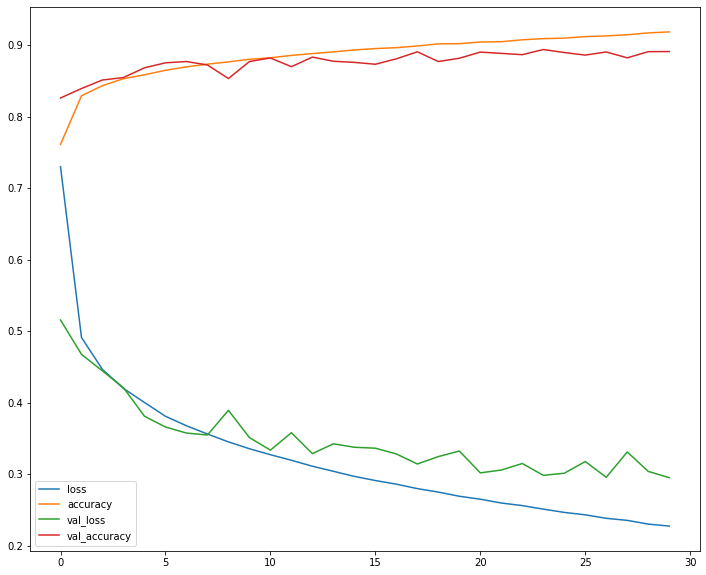

In [25]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize = (12,10))
ax.plot(df.index.values.tolist(),df["loss"], label = "loss")
ax.plot(df.index.values.tolist(),df["accuracy"], label = "accuracy")
ax.plot(df.index.values.tolist(),df["val_loss"], label = "val_loss")
ax.plot(df.index.values.tolist(),df["val_accuracy"], label = "val_accuracy")
ax.legend()

In [27]:
model.evaluate(X_test, y_test, return_dict=True)

313/313 [==============================] - 1s 2ms/step - loss: 56.0863 - accuracy: 0.8570


{'loss': 56.08626174926758, 'accuracy': 0.8569999933242798}

Making predictions using a model

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
#y_proba.round(2)

In [29]:
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
model.predict_classes(X_new)

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

<h2> Building a Regression MLP using the Sequential API </h2> 

In [31]:
#using a regression neural network
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
x_train_full_reg,x_test_reg,y_train_full_reg,y_test_reg = train_test_split(housing.data, housing.target)


x_train_reg, x_valid_reg, y_train_reg, y_valid_reg = train_test_split(x_train_full_reg, y_train_full_reg)

In [32]:
scaler = StandardScaler()
#notice that we fit_transform on the train set and transform on the validation and test sets
x_train_reg_scaled = scaler.fit_transform(x_train_reg)
x_valid_reg_scaled = scaler.transform(x_valid_reg)
x_test_reg_scaled = scaler.transform(x_test_reg)

In [56]:
model_reg = keras.models.Sequential()

In [57]:
#adding input layer
model_reg.add(keras.layers.InputLayer(input_shape = x_train_reg_scaled.shape[1:]))
model_reg.add(keras.layers.Dense(30, activation = "relu"))
#the output neuron has no activation function to it
model_reg.add(keras.layers.Dense(1))

In [58]:
model_reg.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [37]:
#no need to always add the input_layer. We can always user keras.layers.Dense
model_test = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=x_train_reg_scaled.shape[1:]),
keras.layers.Dense(1)
])

In [46]:
x_train_reg_scaled.shape[1:]

(8,)

In [43]:
model_test.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [61]:
model_reg.compile(loss = "mean_squared_error", optimizer = "sgd", metrics=tf.keras.metrics.MeanSquaredError())

In [62]:
""" for epoch in range(n_epochs):
for i in range(m):
random_index = np.random.randint(m)
xi = X_b[random_index:random_index+1]
yi = y[random_index:random_index+1]
gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
eta = learning_schedule(epoch * m + i)
theta = theta - eta * gradients """

#The above code shows how epochs work. For each epoch, It selects batches of instances and then applies the training for a stochastic instance in each batch.

history = model_reg.fit(x_train_reg_scaled, y_train_reg, epochs = 20, validation_data = (x_valid_reg_scaled, y_valid_reg))


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.7304 - mean_squared_error: 1.7304 - val_loss: 0.6826 - val_mean_squared_error: 0.6826
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.2528 - mean_squared_error: 1.2528 - val_loss: 0.6061 - val_mean_squared_error: 0.6061
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6275 - mean_squared_error: 0.6275 - val_loss: 0.4909 - val_mean_squared_error: 0.4909
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4486 - mean_squared_error: 0.4486 - val_loss: 0.4418 - val_mean_squared_error: 0.4418
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6489 - mean_squared_error: 0.6489 - val_loss: 0.4395 - val_mean_squared_error: 0.4395
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4327 - mean_squared_error: 0.4327 - val_loss: 0.4252 - val_mean_squared_error: 0.4252
Epoch 7/20
363/363 [========

In [64]:
history.history

{'loss': [0.9852902293205261,
  2.0158286094665527,
  0.6145811676979065,
  0.428658664226532,
  0.5876898765563965,
  0.4080439507961273,
  0.3914754390716553,
  0.3785764276981354,
  0.37486231327056885,
  0.38066956400871277,
  0.3615168333053589,
  0.363393634557724,
  0.3505457639694214,
  0.3473339080810547,
  0.34391239285469055,
  0.3422323167324066,
  0.3429763913154602,
  0.33667781949043274,
  0.349025696516037,
  0.3378256559371948],
 'mean_squared_error': [0.9852902293205261,
  2.0158286094665527,
  0.6145811676979065,
  0.428658664226532,
  0.5876898765563965,
  0.4080439507961273,
  0.3914754390716553,
  0.3785764276981354,
  0.37486231327056885,
  0.38066956400871277,
  0.3615168333053589,
  0.363393634557724,
  0.3505457639694214,
  0.3473339080810547,
  0.34391239285469055,
  0.3422323167324066,
  0.3429763913154602,
  0.33667781949043274,
  0.349025696516037,
  0.3378256559371948],
 'val_loss': [0.6825786828994751,
  0.6060821413993835,
  0.4908975660800934,
  0.4418

In [65]:
model_test.compile(loss = "mean_squared_error", optimizer = "sgd")

In [66]:

history = model_test.fit(x_train_reg_scaled, y_train_reg, epochs = 20, validation_data = (x_valid_reg_scaled, y_valid_reg))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.3019 - val_loss: 1.1518
Epoch 2/20
363/363 [==============================] - 0s 997us/step - loss: 1.1352 - val_loss: 0.5463
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4684 - val_loss: 0.4384
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4302 - val_loss: 0.4539
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4057 - val_loss: 0.4038
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3632 - val_loss: 0.3990
Epoch 7/20
363/363 [==============================] - 0s 999us/step - loss: 0.3837 - val_loss: 0.3861
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3572 - val_loss: 0.3827
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3623 - val_loss: 0.3754
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3648 - val_loss: 0.

<h3> Building complex models using the Functional API </h3> 

These are non sequential neural networks. This architecture allows a neural network to learn both deep patterns (using the deep path) and simple rules (through the short path)

In [71]:
#for functional APIS
#new layer = newlayerconfig(previous_layer)
#create an Input opbject
inputlayer = keras.layers.Input(shape = X_train.shape[1:])
#30 neuron dense layer using ReLU activation. Once created we call it like a function and pass in the input layer as a parameter
hidden1 = keras.layers.Dense(30, activation = "relu")(inputlayer)
#second hidden layer
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
#this concatenates the input and the output of the second layer
concat = keras.layers.concatenate([inputlayer,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [inputlayer], outputs = [output])

In [72]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 28, 30)       870         input_9[0][0]                    
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 28, 30)       930         dense_23[0][0]                   
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 28, 58)       0           input_9[0][0]                    
                                                                 dense_24[0][0]               